In [40]:
from boto.s3.connection import S3Connection
import pyart
import gzip
from matplotlib import pyplot as plt
import shutil, os
%matplotlib inline

In [32]:
conn = S3Connection(anon=True)
bucket = conn.get_bucket('testradar')


ERROR:boto:Caught exception reading instance data
Traceback (most recent call last):
  File "/Users/scollis/anaconda/lib/python2.7/site-packages/boto/utils.py", line 210, in retry_url
    r = opener.open(req, timeout=timeout)
  File "/Users/scollis/anaconda/lib/python2.7/urllib2.py", line 431, in open
    response = self._open(req, data)
  File "/Users/scollis/anaconda/lib/python2.7/urllib2.py", line 449, in _open
    '_open', req)
  File "/Users/scollis/anaconda/lib/python2.7/urllib2.py", line 409, in _call_chain
    result = func(*args)
  File "/Users/scollis/anaconda/lib/python2.7/urllib2.py", line 1227, in http_open
    return self.do_open(httplib.HTTPConnection, req)
  File "/Users/scollis/anaconda/lib/python2.7/urllib2.py", line 1197, in do_open
    raise URLError(err)
URLError: <urlopen error timed out>
ERROR:boto:Unable to read instance data, giving up


In [43]:
LOCAL_PATH = '/data/'
filenames = []
bucket_list = bucket.list()
for l in bucket_list:
    keyString = str(l.key)
    print(keyString)
    if '.gz' in keyString:
        l.get_contents_to_filename(LOCAL_PATH+keyString)
        filenames.append(LOCAL_PATH+keyString[0:-3])
        gzfh = gzip.open(LOCAL_PATH+keyString, 'rb')
        ofh = open(LOCAL_PATH+keyString[0:-3], 'wb')
        for line in gzfh:
            ofh.write(line)
        ofh.close()
        gzfh.close()
        os.remove(LOCAL_PATH+keyString)
        


CSU_unfolded/
CSU_unfolded/CPOL_corr_20060122_140009_vt_unfolded_hand.cfrad.nc.gz
CSU_unfolded/CPOL_corr_20060122_141010_vt_unfolded_hand.cfrad.nc.gz
CSU_unfolded/CPOL_corr_20060122_142009_vt_unfolded_hand.cfrad.nc.gz
CSU_unfolded/CPOL_corr_20060122_143009_vt_unfolded_hand.cfrad.nc.gz
CSU_unfolded/CPOL_corr_20060122_144009_vt_unfolded_hand.cfrad.nc.gz
CSU_unfolded/CPOL_corr_20060122_145009_vt_unfolded_hand.cfrad.nc.gz
zindex.png


In [45]:
radar = pyart.io.read(filenames[0])


In [47]:
print(radar.fields.keys())

[u'cross_correlation_coefficient', u'CVR', u'reflectivity', u'corrected_velocity', u'VT', u'specific_differential_phase', u'velocity', u'CVD', u'corrected_differential_reflectivity']


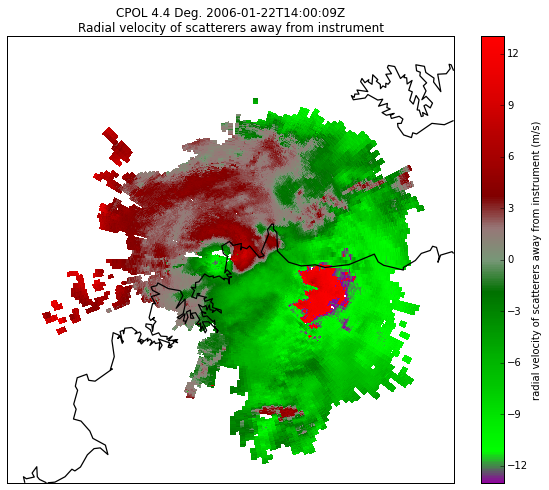

In [52]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('velocity', sweep = 5, resolution = 'i',
                    vmin = -13, vmax = 13, mask_outside = False,
                    cmap = pyart.graph.cm.NWSVel)


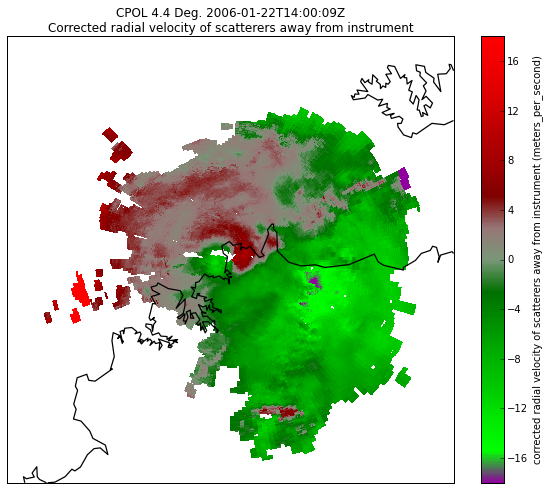

In [56]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('CVD', sweep = 5, resolution = 'i',
                    vmin = -18, vmax = 18, mask_outside = False,
                    cmap = pyart.graph.cm.NWSVel)
